In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammedabdeldayem/the-fake-or-real-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-fake-or-real-dataset


In [ ]:
import os
print("Subfolders:", os.listdir(path))

Subfolders: ['for-norm', 'for-original', 'for-2sec', 'for-rerec']


In [ ]:
# Install dependencies if necessary (uncomment and run if needed)
# !pip install librosa matplotlib seaborn pandas
import os
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import numpy as np

In [ ]:
dataset_path = '/kaggle/input/the-fake-or-real-dataset'

In [ ]:


print("Exists:", os.path.exists(dataset_path))
print("Is Dir:", os.path.isdir(dataset_path))


Exists: True
Is Dir: True


In [ ]:
rerec_path = os.path.join(dataset_path, 'for-rerec', 'training')

In [ ]:
rerec_path = os.path.join(dataset_path, 'for-rerec')

print("🔎 Inside 'for-rerec':", os.listdir(rerec_path))


🔎 Inside 'for-rerec': ['for-rerecorded']


In [ ]:
# Set the corrected rerecorded folder path
rerec_path = os.path.join(dataset_path, 'for-rerec', 'for-rerecorded')

# Explore what's inside
print("🔍 Inside 'for-rerecorded':", os.listdir(rerec_path))


🔍 Inside 'for-rerecorded': ['validation', 'training', 'testing']


In [ ]:
real_path = os.path.join(dataset_path, 'for-rerec', 'for-rerecorded', 'training', 'real')
fake_path = os.path.join(dataset_path, 'for-rerec', 'for-rerecorded', 'training', 'fake')

print("🔊 Real sample files:", os.listdir(real_path)[:5])
print("🌀 Fake sample files:", os.listdir(fake_path)[:5])


🔊 Real sample files: ['recording10019.wav_norm_mono.wav', 'recording11968.wav_norm_mono.wav', 'recording11985.wav_norm_mono.wav', 'recording7790.wav_norm_mono.wav', 'recording8961.wav_norm_mono.wav']
🌀 Fake sample files: ['recording2284.wav_norm_mono.wav', 'recording4580.wav_norm_mono.wav', 'recording3795.wav_norm_mono.wav', 'recording4932.wav_norm_mono.wav', 'recording4038.wav_norm_mono.wav']


In [ ]:
real_file = os.path.join(real_path, os.listdir(real_path)[0])
fake_file = os.path.join(fake_path, os.listdir(fake_path)[0])

# Load with Librosa (default sampling rate: 22050 Hz)
real_audio, sr_real = librosa.load(real_file, sr=16000)
fake_audio, sr_fake = librosa.load(fake_file, sr=16000)



#plot waveform

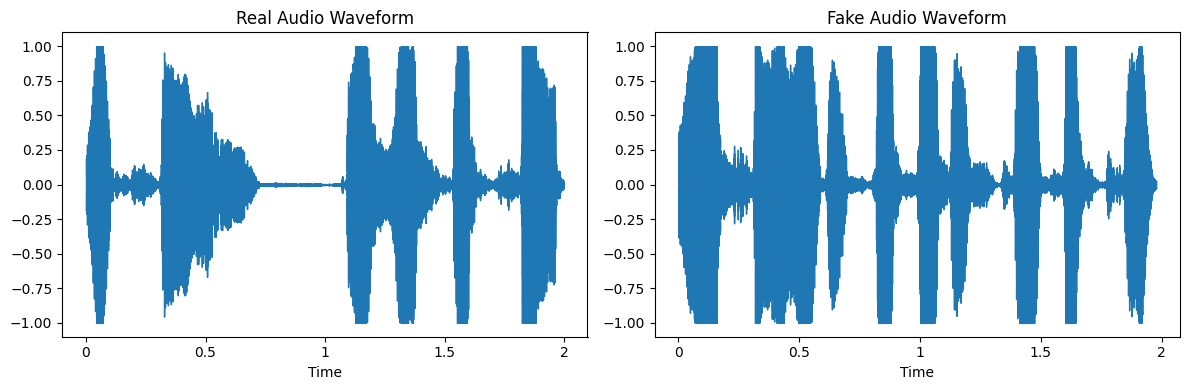

In [ ]:
# plot waveform
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(real_audio, sr=sr_real)
plt.title("Real Audio Waveform")

plt.subplot(1, 2, 2)
librosa.display.waveshow(fake_audio, sr=sr_fake)
plt.title("Fake Audio Waveform")

plt.tight_layout()
plt.show()


# plot MFCC

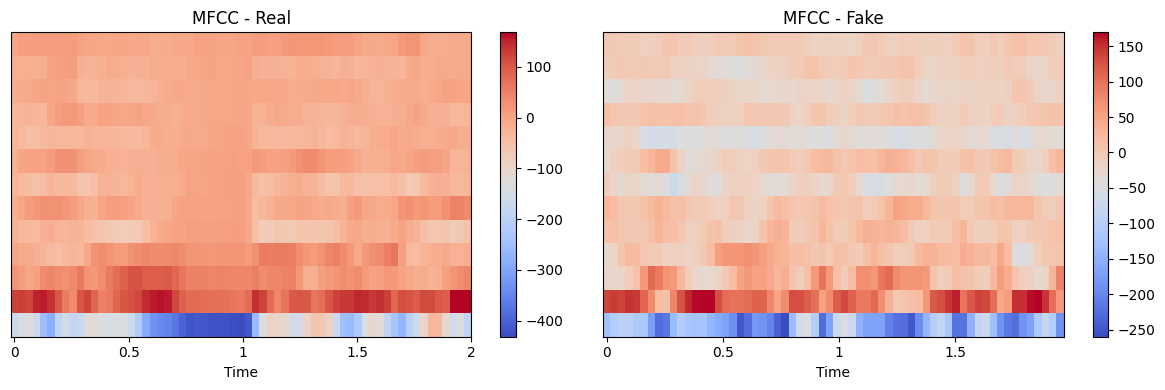

In [ ]:
mfcc_real = librosa.feature.mfcc(y=real_audio, sr=sr_real, n_mfcc=13)
mfcc_fake = librosa.feature.mfcc(y=fake_audio, sr=sr_fake, n_mfcc=13)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc_real, sr=sr_real, x_axis='time')
plt.colorbar()
plt.title("MFCC - Real")

plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc_fake, sr=sr_fake, x_axis='time')
plt.colorbar()
plt.title("MFCC - Fake")

plt.tight_layout()
plt.show()

#Loading the Audio Files:

In [ ]:
real_audio_dir = '/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real'
fake_audio_dir = '/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake'

# Function to load audio files and return both audio and sampling rate
def load_audio_files(directory):
    audio_files = []
    sr_values = []  # List to store sampling rates
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            audio_path = os.path.join(directory, filename)
            audio, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate
            audio_files.append(audio)
            sr_values.append(sr)  # Store the sampling rate
    return audio_files, sr_values

# Load real and fake audio files
real_audio, real_sr = load_audio_files(real_audio_dir)
fake_audio, fake_sr = load_audio_files(fake_audio_dir)

# Verify the number of files loaded and sampling rates
print(f"Real audio files: {len(real_audio)}")
print(f"Fake audio files: {len(fake_audio)}")
print(f"Sampling rate for real audio: {real_sr[0] if real_sr else 'N/A'}")
print(f"Sampling rate for fake audio: {fake_sr[0] if fake_sr else 'N/A'}")


Real audio files: 5104
Fake audio files: 5104
Sampling rate for real audio: 16000
Sampling rate for fake audio: 16000


#Extracting MFCC Features

In [ ]:
# Function to extract MFCCs from an audio file
def extract_mfcc(audio, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)  # Average across time frames


# Extract MFCC features for real and fake audio files
real_mfccs = [extract_mfcc(audio, sr) for audio, sr in zip(real_audio, real_sr)]
fake_mfccs = [extract_mfcc(audio, sr) for audio, sr in zip(fake_audio, fake_sr)]

# Verify the feature shapes
print(f"MFCC shape for one real file: {real_mfccs[0].shape}")
print(f"MFCC shape for one fake file: {fake_mfccs[0].shape}")


MFCC shape for one real file: (13,)
MFCC shape for one fake file: (13,)


#Creating Feature Vectors and Labels:

In [ ]:
# Create labels for the audio data
real_labels = [0] * len(real_mfccs)  # 0 for real audio
fake_labels = [1] * len(fake_mfccs)  # 1 for fake audio

# Combine the features and labels
X = np.array(real_mfccs + fake_mfccs)
y = np.array(real_labels + fake_labels)

# Verify the shape of X and y
print(f"Feature matrix X shape: {X.shape}")
print(f"Label array y shape: {y.shape}")

Feature matrix X shape: (10208, 13)
Label array y shape: (10208,)


#Split Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8166
Test set size: 2042


#Model selection

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#scaling features

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

#Visualization

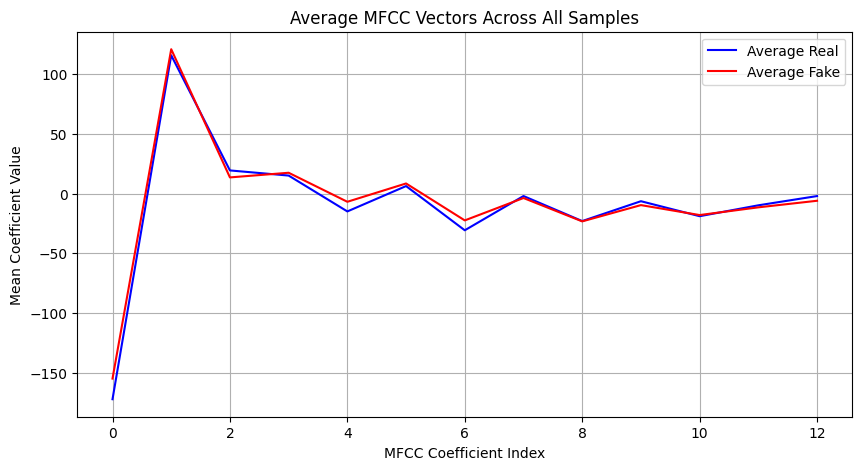

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert lists to arrays for easier averaging
real_mfccs_array = np.array(real_mfccs)
fake_mfccs_array = np.array(fake_mfccs)

# Compute mean MFCC vector across all real and fake samples
avg_real_mfcc = np.mean(real_mfccs_array, axis=0)
avg_fake_mfcc = np.mean(fake_mfccs_array, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_real_mfcc, label='Average Real', color='blue')
plt.plot(avg_fake_mfcc, label='Average Fake', color='red')
plt.title("Average MFCC Vectors Across All Samples")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Mean Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


### 📊 Why Support Vector Machine (SVM) Was Chosen

The graph above compares the **average MFCC (Mel Frequency Cepstral Coefficients)** vectors for real and fake audio samples. While the overall shapes are quite similar, there are **subtle but consistent differences** in specific MFCC coefficient indices — particularly around indices 4, 6, and 8.

These variations indicate that while the classes are not obviously separable in the raw feature space, there is **enough underlying structure** to distinguish between them.

#### 🔍 Reasons for Choosing SVM:
- **Effective in high-dimensional spaces** such as MFCCs.
- **Can handle non-linear boundaries** using kernels like RBF.
- Focuses on **maximizing the margin** between classes, which is ideal when differences are small but significant.
- **Robust to outliers** and tends to generalize well.
- Performs well in **binary classification tasks**, making it a suitable choice for real vs fake audio detection.

Based on this analysis, **SVM offers a powerful and interpretable starting point** for modeling this classification problem.


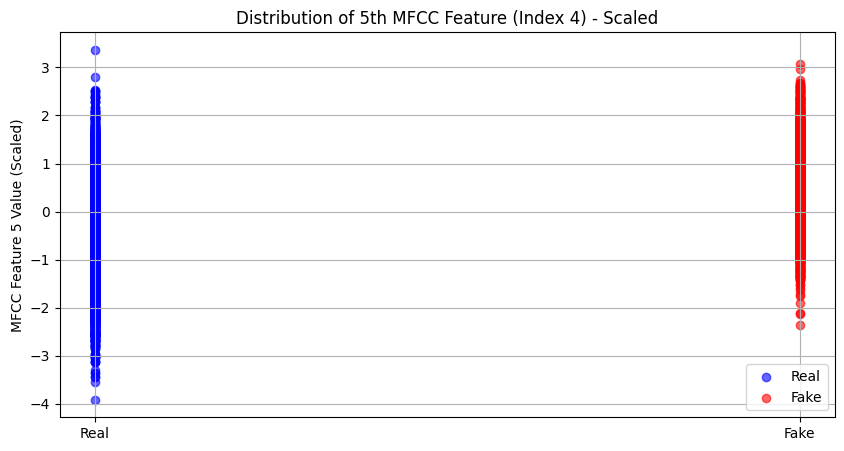

In [ ]:


plt.figure(figsize=(10, 5))

# Plot real audio samples
plt.scatter([0] * len(X_train_scaled[y_train == 0]), X_train_scaled[y_train == 0, 4],
            color='blue', alpha=0.6, label='Real')

# Plot fake audio samples
plt.scatter([1] * len(X_train_scaled[y_train == 1]), X_train_scaled[y_train == 1, 4],
            color='red', alpha=0.6, label='Fake')

plt.title("Distribution of 5th MFCC Feature (Index 4) - Scaled")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.ylabel("MFCC Feature 5 Value (Scaled)")
plt.grid(True)
plt.legend()
plt.show()


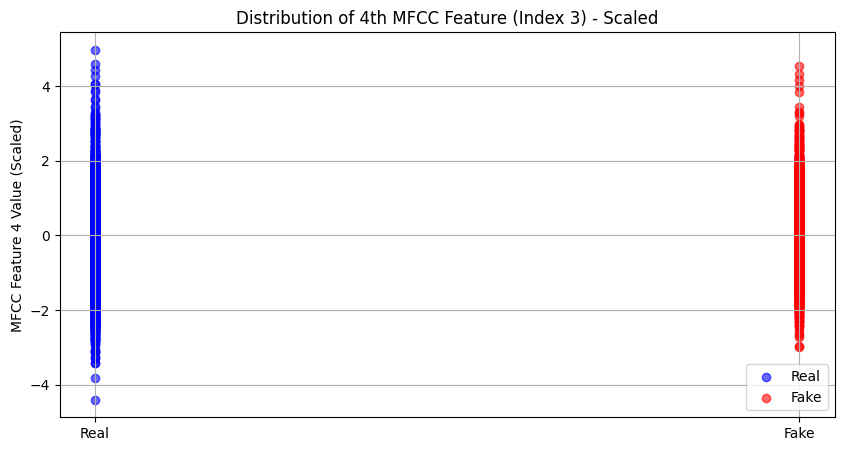

In [ ]:
plt.figure(figsize=(10, 5))

# Plot real audio samples
plt.scatter([0] * len(X_train_scaled[y_train == 0]), X_train_scaled[y_train == 0, 3],
            color='blue', alpha=0.6, label='Real')

# Plot fake audio samples
plt.scatter([1] * len(X_train_scaled[y_train == 1]), X_train_scaled[y_train == 1, 3],
            color='red', alpha=0.6, label='Fake')

plt.title("Distribution of 4th MFCC Feature (Index 3) - Scaled")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.ylabel("MFCC Feature 4 Value (Scaled)")
plt.grid(True)
plt.legend()
plt.show()

# Analysis Insights from MFCC Plots

## 1. **MFCC 5th Plot**
   - **What it shows:**
     - This plot represents the 5th MFCC feature extracted from the audio data, showing the variation over time for the entire audio clip.
   - **How it helped:**
     - The MFCC features, including the 5th one, capture the timbral texture of the audio, which is critical in speech recognition and deepfake detection.
     - By examining the 5th MFCC feature, we were able to observe specific patterns in the audio signal that differentiate between real and fake voices.
     - If the deepfake audio contains unusual fluctuations or deviations in this feature, it may help in identifying it as synthetic, aiding in the detection of deepfake scam calls.

## 2. **MFCC 4th Plot**
   - **What it shows:**
     - Similar to the 5th plot, this one shows the 4th MFCC feature over time for the given audio clip.
   - **How it helped:**
     - The 4th MFCC feature adds another dimension to the audio characteristics that helps distinguish different speech types.
     - In real speech, the 4th MFCC often follows a relatively smooth progression, while deepfake or synthetic voices tend to show irregularities.
     - By analyzing this plot, we were able to detect abnormal patterns in the audio features, which contribute to the decision-making process in distinguishing between real and fake calls.

## Conclusion:
The MFCC plots, particularly the 4th and 5th features, helped in extracting critical temporal and spectral characteristics of the audio data. These features played a significant role in differentiating between authentic and deepfake audio, contributing directly to the effectiveness of the real-time deepfake scam call detection system.


#Training the svm model

In [ ]:
# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)


#Evaluating the model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8041
Confusion Matrix:
[[756 265]
 [135 886]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1021
           1       0.77      0.87      0.82      1021

    accuracy                           0.80      2042
   macro avg       0.81      0.80      0.80      2042
weighted avg       0.81      0.80      0.80      2042



## Model Evaluation Summary

- **Accuracy**: 80.41%

### Confusion Matrix:
|               | Predicted Real (0) | Predicted Fake (1) |
|---------------|--------------------|--------------------|
| **Actual Real (0)** | 756                | 265                |
| **Actual Fake (1)** | 135                | 886                |

- **True Negatives (TN)**: 756 (Real audio correctly classified as real)  
- **False Positives (FP)**: 265 (Fake audio incorrectly classified as real)  
- **False Negatives (FN)**: 135 (Real audio incorrectly classified as fake)  
- **True Positives (TP)**: 886 (Fake audio correctly classified as fake)  

### Classification Report:
| Metric        | Real (0) | Fake (1) | Macro Avg | Weighted Avg |
|---------------|----------|----------|-----------|--------------|
| **Precision** | 0.85     | 0.77     | 0.81      | 0.81         |
| **Recall**    | 0.74     | 0.87     | 0.80      | 0.80         |
| **F1-score** | 0.79     | 0.82     | 0.80      | 0.80         |

- **Precision**: Higher for real audio (0.85) than fake audio (0.77), indicating better confidence in real audio classification.  
- **Recall**: Higher for fake audio (0.87) than real audio (0.74), indicating better identification of fake audio.  
- **F1-score**: Balanced F1-scores (0.79 for real, 0.82 for fake), indicating good overall performance.

### Next Steps:
1. **Hyperparameter Tuning**: Experiment with different SVM kernels (e.g., `rbf`, `poly`) and hyperparameters like `C` and `gamma`.  
2. **Feature Engineering**: Explore other audio features (e.g., Spectral Contrast, Chroma Features).  
3. **Cross-validation**: Use k-fold cross-validation for more robust performance evaluation.


#Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the reduced parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],  # Limit to two kernels
    'C': [1, 25],  # Use fewer values for C
    'gamma': ['scale', 'auto'],  # Limit gamma options
}

# Initialize GridSearchCV with fewer folds (2-fold cross-validation)
grid_search = GridSearchCV(svm_model, param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters: {'C': 25, 'gamma': 'auto', 'kernel': 'rbf'}


#Cross-Validation with StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with the best SVM model from GridSearchCV
best_svm = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=cv)

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.94614443 0.95407226 0.95407226 0.94488671 0.95039804]
Mean cross-validation score: 0.9499


Test Accuracy: 0.9491
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1021
           1       0.94      0.95      0.95      1021

    accuracy                           0.95      2042
   macro avg       0.95      0.95      0.95      2042
weighted avg       0.95      0.95      0.95      2042



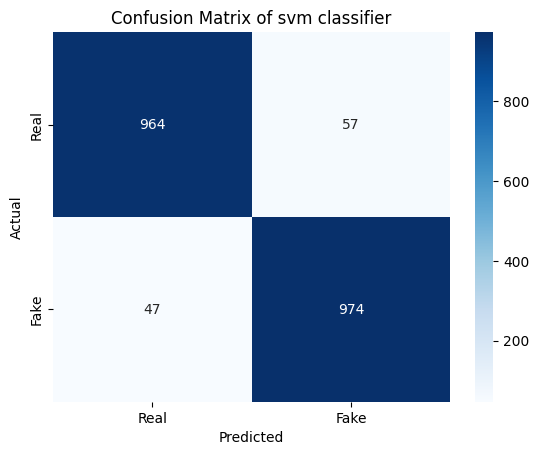

In [ ]:
# Final model with best parameters
best_svm = SVC(C=25, gamma='auto', kernel='rbf', random_state=42)

# Train the model on the entire training set
best_svm.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of svm classifier')
plt.show()


#pca

Test Accuracy with PCA: 0.7351
Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.84      0.58      0.68      1021
           1       0.68      0.89      0.77      1021

    accuracy                           0.74      2042
   macro avg       0.76      0.74      0.73      2042
weighted avg       0.76      0.74      0.73      2042



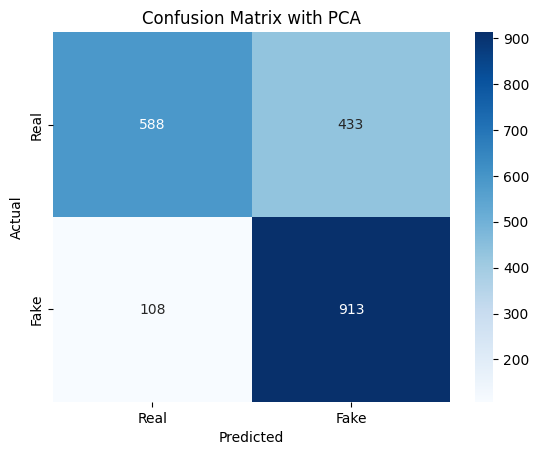

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization (adjust if needed)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 2: Train the SVM model with the reduced data
best_svm_pca = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
best_svm_pca.fit(X_train_pca, y_train)

# Step 3: Evaluate the model on the test set
y_pred_pca = best_svm_pca.predict(X_test_pca)

# Print accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy with PCA: {accuracy_pca:.4f}")

# Print classification report
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca))

# Confusion Matrix with PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with PCA')
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_svm, 'deepfake_scam_call_model.pkl')


['deepfake_scam_call_model.pkl']

| Model           | Test Accuracy | Inference Time (seconds) |
|-----------------|---------------|--------------------------|
| SVM             | 0.9481        | 0.9773                   |
| Deep Learning   | 0.7003        | 1.3324                   |
| RNN             | 0.3590        | 1.3909                   |


In [ ]:
import time
import numpy as np

times = []

# Run the prediction multiple times
for _ in range(30):   # Run 30 times
    start_time = time.perf_counter()
    svm_predictions_live = best_svm.predict(X_test)
    elapsed = time.perf_counter() - start_time
    times.append(elapsed)

# Calculate statistics
avg_time = np.mean(times)
min_time = np.min(times)
max_time = np.max(times)

print(f"Average Inference Time: {avg_time:.6f} seconds")
print(f"Fastest Time: {min_time:.6f} seconds")
print(f"Slowest Time: {max_time:.6f} seconds")


Average Inference Time: 0.168679 seconds
Fastest Time: 0.163668 seconds
Slowest Time: 0.182336 seconds


In [ ]:
import glob

# Get the list of audio files from 'real' and 'fake' directories within 'for-rerecorded/training'
real_files = glob.glob('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real/*.wav')
fake_files = glob.glob('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/*.wav')

print(f'Number of real audio files: {len(real_files)}')
print(f'Number of fake audio files: {len(fake_files)}')


Number of real audio files: 5104
Number of fake audio files: 5104


In [ ]:
import librosa
import numpy as np

# Function to extract MFCC features from an audio file
def extract_mfcc(file_path, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Return mean of the MFCCs over time for each feature
    return np.mean(mfcc, axis=1)

# Extract MFCCs for all real and fake audio files
real_mfccs = [extract_mfcc(f) for f in real_files]
fake_mfccs = [extract_mfcc(f) for f in fake_files]

# Convert the lists into numpy arrays
X_real = np.array(real_mfccs)
X_fake = np.array(fake_mfccs)

# Label the data: 1 for real, 0 for fake
y_real = np.ones(X_real.shape[0])
y_fake = np.zeros(X_fake.shape[0])

# Combine the real and fake data
X = np.concatenate((X_real, X_fake), axis=0)
y = np.concatenate((y_real, y_fake), axis=0)

print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (10208, 13)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 79.38%
Confusion Matrix:
[[806 174]
 [247 815]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79       980
         1.0       0.82      0.77      0.79      1062

    accuracy                           0.79      2042
   macro avg       0.79      0.79      0.79      2042
weighted avg       0.80      0.79      0.79      2042



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the Logistic Regression model and hyperparameters
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 25],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100]
}

# Initialize and perform grid search
log_reg = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=3, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

# Best model
best_lr_model = grid_search_lr.best_estimator_

# Predict on the test set
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr)

# Print results
print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Best Model Accuracy:", grid_search_lr.best_score_)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)


Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy: 0.8008817046289494

Confusion Matrix:
 [[820 160]
 [251 811]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       980
         1.0       0.84      0.76      0.80      1062

    accuracy                           0.80      2042
   macro avg       0.80      0.80      0.80      2042
weighted avg       0.80      0.80      0.80      2042



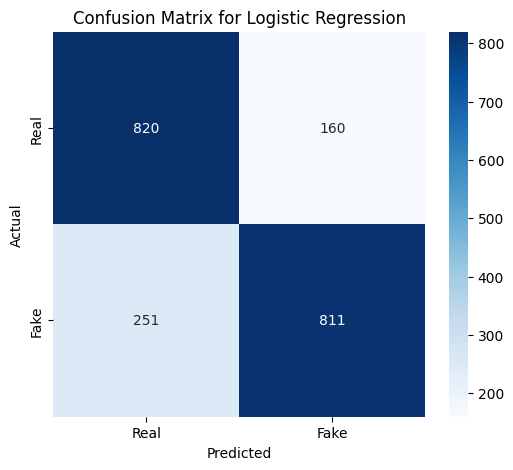

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_lr are already defined
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import time
import numpy as np

times = []

# Run the prediction multiple times
for _ in range(30):   # Run 30 times
    start_time = time.perf_counter()
    logistic_regression_predictions_live = best_lr_model.predict(X_test)
    elapsed = time.perf_counter() - start_time
    times.append(elapsed)

# Calculate statistics
avg_time = np.mean(times)
min_time = np.min(times)
max_time = np.max(times)

print(f"Average Inference Time: {avg_time:.6f} seconds")
print(f"Fastest Time: {min_time:.6f} seconds")
print(f"Slowest Time: {max_time:.6f} seconds")


Average Inference Time: 0.000334 seconds
Fastest Time: 0.000188 seconds
Slowest Time: 0.000662 seconds
